# Earthquake Analysis

This project analyzes earthquakes, using a public dataset provided by the USGS Nathional Earthquake Information Center (NEIC).

### Datasets

| Name | Source | Link |
| :-- | :-- | :-- |
| earthquakes.csv | USGS NEIC | [Kaggle](https://www.kaggle.com/usgs/earthquake-database)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [36]:
df_quakes = pd.read_csv(r"..\Data\earthquakes.csv")

In [37]:
df_quakes

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [24]:
# slice year string

def getYear(inputStr):
    year = inputStr[-4:]
    return year


df_quakes['Year'] = df_quakes['Date'].apply(getYear)

'1965'

In [42]:
# output exceptions to csv

# catch exceptions
def convertDate(inputStr):
    if(len(inputStr) == 10):
        obj = datetime.strptime(inputStr, '%m/%d/%Y')
    else:
        obj = -1
        
    return obj


df_quakes['DateObj'] = df_quakes['Date'].apply(convertDate)


df_exceptions = df_quakes.loc[df_quakes['DateObj'] == -1]
df_exceptions.to_csv("../Output/exceptions.csv", index=False)

In [55]:
def convertDate(inputStr):
    if(len(inputStr) == 10):
        obj = datetime.strptime(inputStr, '%m/%d/%Y')
    else:
        date = inputStr.split('T')[0]
        obj = datetime.strptime(date, '%Y-%m-%d')
        
    return obj

convertDate('01/02/1965')
convertDate('1975-02-23T02:58:41.000Z')

df_quakes['DateObj'] = df_quakes['Date'].apply(convertDate)

# Lambda Functions

In [46]:
obj = convertDate('01/02/1965')
obj.strftime('%Y')

'1965'

In [51]:
def getYear(obj):
    year = obj.strftime('%Y')
    return year

df_quakes['Year'] = df_quakes['DateObj'].apply(getYear)

In [56]:
df_quakes['Year'] = df_quakes['DateObj'].apply(lambda x: x.strftime('%Y'))

# Visualizations

In [60]:
# count earthquakes per year
df_peryear = df_quakes[['Year', 'Magnitude']].groupby(['Year']).count() \
                            .rename(columns={'Magnitude': 'Count'})

df_peryear.head()

,Count
Year,
1965,339
1966,234
1967,255
1968,305
1969,323


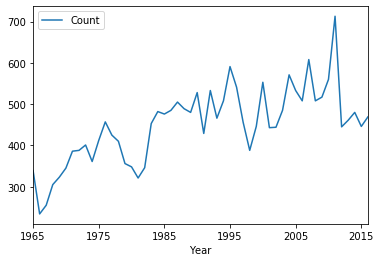

In [62]:
import matplotlib.pyplot as plt

df_peryear.plot()